In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

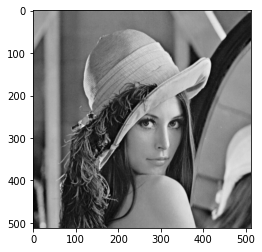

In [2]:
img= cv2.imread('Lenna.png',0)
height,width=img.shape
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(img,'gray')

In [3]:
lenna=cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_CONSTANT,value=0)
arr=np.asarray(lenna)


In [4]:
kernel=np.array([[1,4,6,4,1],
                [4,16,24,16,4],
                [6,24,36,24,6],
                [4,16,24,16,4],
                [1,4,6,4,1]])

sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

avg=np.zeros(img.shape,dtype='uint8')
sobel=np.zeros(img.shape)

In [5]:
for i in range(height):
    for j in range(width):
        avg[i,j]=int(np.sum(lenna[i:i+5 , j:j+5]*kernel)/np.sum(kernel))



In [6]:
sb_i=cv2.copyMakeBorder(avg,1,1,1,1,cv2.BORDER_CONSTANT,value=0)


[[ 364.  121.   23. ...  -58. -157. -346.]
 [ 562.  186.   34. ...  -90. -240. -533.]
 [ 622.  205.   36. ... -100. -263. -587.]
 ...
 [ 206.   83.   28. ...  -18. -138. -417.]
 [ 186.   78.   29. ...  -16. -125. -386.]
 [ 121.   51.   20. ...  -10.  -81. -254.]]
[[-364. -561. -619. ... -622. -535. -332.]
 [-124. -190. -208. ... -208. -180. -113.]
 [ -26.  -39.  -42. ...  -32.  -27.  -17.]
 ...
 [  12.   15.   12. ...    6.    4.    1.]
 [  40.   62.   69. ...  128.  115.   74.]
 [ 117.  187.  216. ...  424.  387.  252.]]


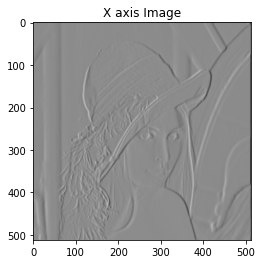

[[ 364.  121.   23. ...  -58. -157. -346.]
 [ 562.  186.   34. ...  -90. -240. -533.]
 [ 622.  205.   36. ... -100. -263. -587.]
 ...
 [ 206.   83.   28. ...  -18. -138. -417.]
 [ 186.   78.   29. ...  -16. -125. -386.]
 [ 121.   51.   20. ...  -10.  -81. -254.]]


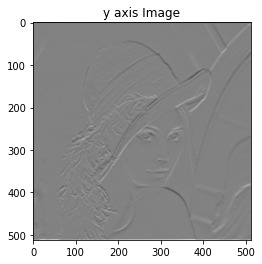

[[-364. -561. -619. ... -622. -535. -332.]
 [-124. -190. -208. ... -208. -180. -113.]
 [ -26.  -39.  -42. ...  -32.  -27.  -17.]
 ...
 [  12.   15.   12. ...    6.    4.    1.]
 [  40.   62.   69. ...  128.  115.   74.]
 [ 117.  187.  216. ...  424.  387.  252.]]


In [8]:
sx=np.zeros(img.shape)
sy=np.zeros(img.shape)

for i in range(height):
    for j in range(width):
        sx[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_x)
        sy[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_y)
        
        sobel[i,j]=round(math.sqrt(sy[i,j]*sy[i,j] + sx[i,j]*sx[i,j]))


# print(sx)
# print(sy)
plt.imshow(sx,'gray')
plt.title("X axis Image")
plt.show()
print(sx)
plt.imshow(sy,'gray')
plt.title("y axis Image")
plt.show()
print(sy)

[[515. 574. 619. ... 625. 558. 480.]
 [576. 266. 211. ... 227. 300. 545.]
 [623. 209.  55. ... 105. 264. 587.]
 ...
 [206.  84.   0. ...   0. 138. 417.]
 [190. 100.  75. ... 129. 170. 393.]
 [168. 194. 217. ... 424. 395. 358.]]


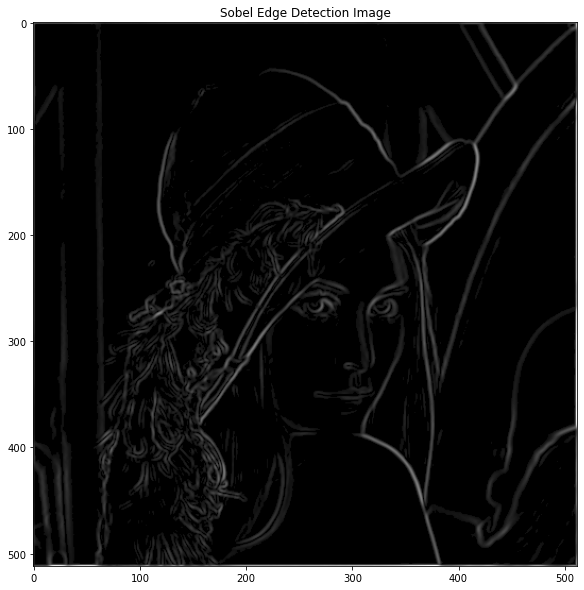

In [20]:
threshold_value=50
for i in range(height):
    for j in range(width):
        if sobel[i][j]<threshold_value:
            sobel[i][j]=0

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
plt.imshow(sobel,'gray')
plt.title("Sobel Edge Detection Image")
print(sobel)